In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Freedom in the World 2013 - 2021 EDA
dataset is available from https://freedomhouse.org/report/freedom-world

In [2]:
# Read country data from excel file
excel_filename = 'All_data_FIW_2013-2021.xlsx'
countries = pd.read_excel(
        excel_filename,
        sheet_name=1,
        header=1,
        usecols='A:G, W, AQ, AR')
# Remove territories from dataset
countries = countries[countries['C/T'] == 'c']
countries = countries.drop('C/T', axis=1)
countries = countries.rename(
        columns={'Country/Territory': 'Country', 'Edition': 'Year'})
countries.head()

,Country,Region,Year,Status,PR rating,CL rating,PR,CL,Total
1,Afghanistan,Asia,2021,NF,5,6,13,14,27
2,Albania,Europe,2021,PF,3,3,27,39,66
3,Algeria,MENA,2021,NF,6,5,10,22,32
4,Andorra,Europe,2021,F,1,1,38,55,93
5,Angola,SSA,2021,NF,6,5,10,21,31


In [3]:
countries.dtypes

Country      object
Region       object
Year          int64
Status       object
PR rating     int64
CL rating     int64
PR            int64
CL            int64
Total         int64
dtype: object

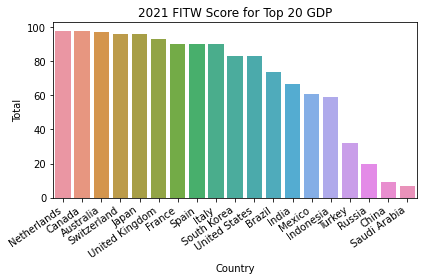

In [4]:
# Bar graph of all counties in 2021
# TODO change to line graph over time
highest_gdp = [
        'United States', 'China', 'Japan', 'United Kingdom', 'India',
        'France', 'Italy', 'Canada', 'South Korea', 'Russia', 'Brazil',
        'Australia', 'Spain', 'Indonesia', 'Mexico', 'Netherlands',
        'Switzerland', 'Saudi Arabia', 'Turkey']
scores = countries[countries['Year'] == 2021]
scores = scores[scores['Country'].isin(highest_gdp)]
scores = scores.sort_values(
        by='Total',
        axis=0,
        ascending=False)
plt.figure()
g = sns.barplot(
        x='Country',
        y='Total',
        data=scores)
g.set_title('2021 FITW Score for Top 20 GDP')
plt.xticks(rotation=35, ha='right')
plt.tight_layout()
plt.savefig('images/country_scores_by_gdp.png')

<Figure size 432x288 with 0 Axes>

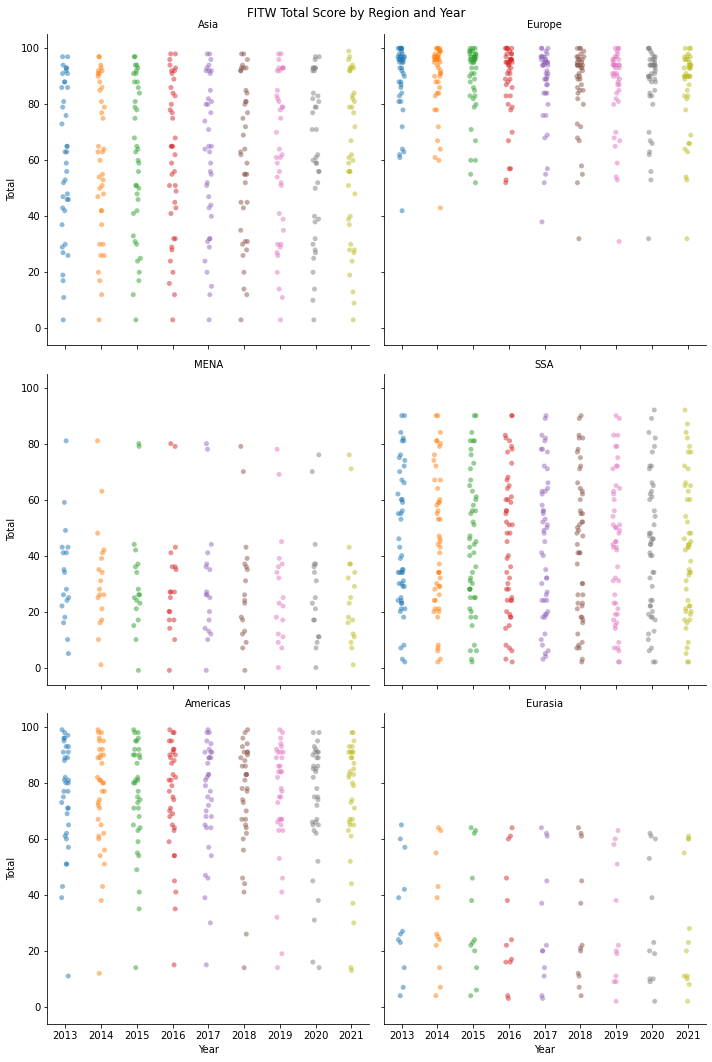

In [5]:
# voilin plot showing the change in distribution by year
plt.figure()
g = sns.catplot(
        x='Year',
        y='Total',
        data=countries,
        kind='strip',
        col='Region',
        col_wrap=2,
        alpha=0.5)
g.set_titles('{col_name}')
g.fig.suptitle('FITW Total Score by Region and Year')
plt.tight_layout()
plt.savefig('images/scores_by_year_and_region_stripplot.png')

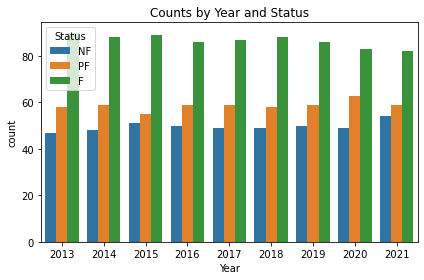

In [6]:
# barplot time vs status
plt.figure()
g = sns.countplot(x='Year', hue='Status', data=countries)
g.set_title('Counts by Year and Status')
plt.savefig('images/counts_by_year_and_status.png')
plt.tight_layout()

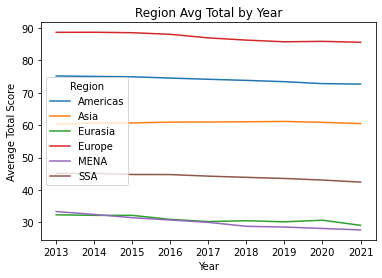

In [7]:
regions = countries.groupby(['Region', 'Year'], as_index=False).mean()
plt.figure()
g = sns.lineplot(x='Year', y='Total', hue='Region', data=regions)
g.set_title('Region Avg Total by Year')
plt.ylabel('Average Total Score')
plt.savefig('images/regions_avg_total_score_by_year.png')

<Figure size 432x288 with 0 Axes>

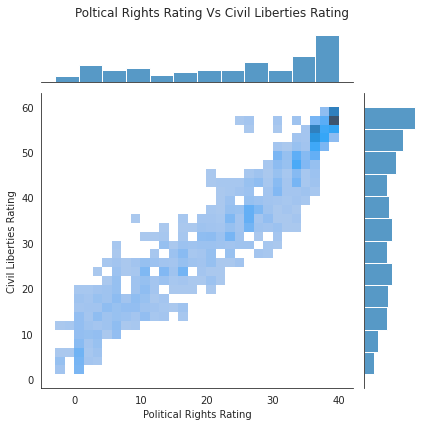

In [8]:
sns.set_style('white')
plt.figure()
g = sns.jointplot(x='PR', y='CL', data=countries, bins=30, kind='hist')
g.ax_joint.set_xlabel('Political Rights Rating')
g.ax_joint.set_ylabel('Civil Liberties Rating')
g.fig.suptitle('Poltical Rights Rating Vs Civil Liberties Rating')
plt.tight_layout()
plt.savefig('images/cl_vs_pr_jointplot.png')


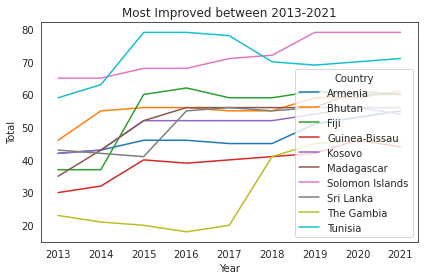

In [9]:
# most improved
changes = countries.pivot(index='Country', columns='Year', values='Total')
changes.columns = changes.columns.map(str)
changes['2013-2021 Change'] = changes['2021'] - changes['2013']
changes = changes.sort_values(by='2013-2021 Change', ascending=False)
improved_countries = changes.iloc[:10].index
improved = countries[countries['Country'].isin(improved_countries)]
plt.figure()
g = sns.lineplot(x='Year', y='Total', data=improved, hue='Country')
g.set_title('Most Improved between 2013-2021')
plt.tight_layout()
plt.savefig('images/most_improved.png')

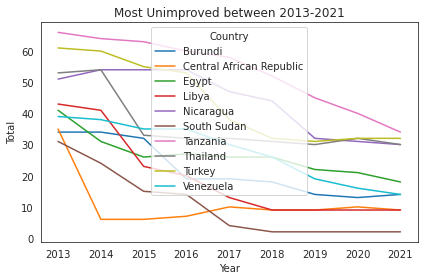

In [10]:
# most unimproved
unimproved_countrys = changes.iloc[-10:].index
unimproved = countries[countries['Country'].isin(unimproved_countrys)]
plt.figure()
g = sns.lineplot(x='Year', y='Total', data=unimproved, hue='Country')
g.set_title('Most Unimproved between 2013-2021')
plt.tight_layout()
plt.savefig('images/most_unimproved.png')


Year                      2013  2014  2015  2016  2017  2018  2019  2020  \
Country                                                                    
Central African Republic    35     6     6     7    10     9     9    10   
Burkina Faso                53    53    45    59    63    60    60    56   
Libya                       43    41    23    20    13     9     9     9   
Mali                        24    44    44    45    45    44    44    41   
The Gambia                  23    21    20    18    20    41    45    46   
...                        ...   ...   ...   ...   ...   ...   ...   ...   
Palau                       92    92    92    92    92    92    92    92   
Norway                     100   100   100   100   100   100   100   100   
North Korea                  3     3     3     3     3     3     3     3   
Switzerland                 96    96    96    96    96    96    96    96   
Finland                    100   100   100   100   100   100   100   100   

Year       

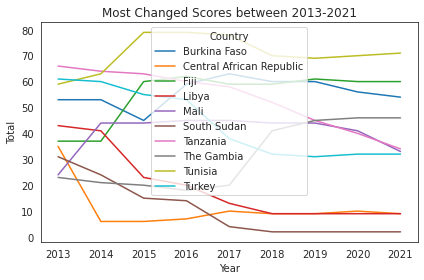

In [11]:
# most changed overall
# make a column for every year and cumsum the differences across columns
def difference(row):
    '''
    Args:
        l (pandas.Series): list of numbers
    Returns:
        total (int): cummulative differences between numbers in list
    '''
    total = 0
    for i in range(len(row)-1):
        total += abs(row[i] - row[i+1])
    return total


changes = changes.drop(columns='2013-2021 Change')
changes['Overall Change'] = changes.apply(difference, axis=1)
changes = changes.sort_values(by='Overall Change', ascending=False)
most_changed_countries = changes.iloc[:10].index
most_changed = countries[countries['Country'].isin(most_changed_countries)]
print(changes)
plt.figure()
g = sns.lineplot(x='Year', y='Total', data=most_changed, hue='Country')
g.set_title('Most Changed Scores between 2013-2021')
plt.tight_layout()
plt.savefig('images/most_changed_between_2013-2021.png')
